In [1]:
addpath(genpath('../../matlab/Linear-STSC/src/'))
addpath(genpath('../../matlab/Non-linear-STSC/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))

close all; clear; clc;

In [2]:
testname = "testcases/Burger3D";

tempname = split(testname,'/');

ttdata = load(sprintf('plot_data/tt_%s.mat',tempname(end)));

Ns = ttdata.Ns;


tttime = cellfun(@(c) c.time, ttdata.R);

tterr = cellfun(@(c) c.err, ttdata.R);


In [3]:
fortran_err = [];

for i = 1:numel(Ns)

filename = sprintf('plot_data/Fortran/Burger_err_%i.dat',Ns(i)); 
fid = fopen(filename, 'r');
data_cell = textscan(fid, '%f');
new_data = cell2mat(data_cell);
fclose(fid);

if exist('fortran_err', 'var') 
    fortran_err = [fortran_err; new_data]; 
else
    fortran_err = new_data; 
end

end

In [4]:
fortran_time = [];

for i = 1:numel(Ns)

filename = sprintf('plot_data/Fortran/Burger_time_%i.dat',Ns(i)); 
fid = fopen(filename, 'r');
data_cell = textscan(fid, '%f');
new_data = cell2mat(data_cell);
fclose(fid);

if exist('fortran_time', 'var') 
    fortran_time = [fortran_time; new_data]; 
else
    fortran_time = new_data; 
end

end

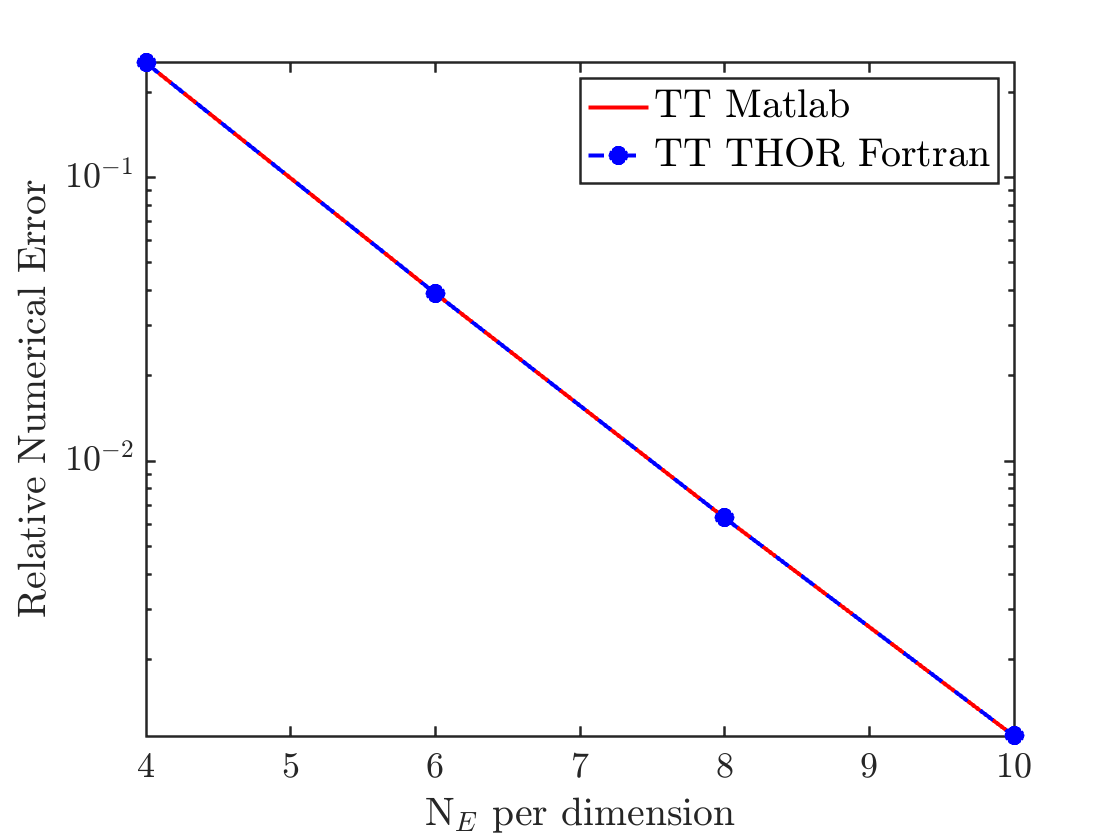

In [5]:
plot(Ns, tterr, '-', ...
    'DisplayName','TT Matlab', ...
    'Color','red', ...
    'LineWidth',2);

hold on;

plot(Ns, fortran_err, '--o', ...
    'DisplayName','TT THOR Fortran', ...
    'Color','blue', ...
    'LineWidth',2, ...   % thicker line
    'MarkerSize',8, ...  % bigger markers
    'MarkerFaceColor','blue'); % filled markers

legend('FontSize',20,'Interpreter','latex');

xlabel(sprintf('N$_E$ per dimension'), 'Interpreter','latex', 'FontSize',20);

ylabel(sprintf('Relative Numerical Error'), 'Interpreter','latex', 'FontSize',20);

set(gca, 'YScale','log', ...
    'FontSize',18, ...
    'LineWidth',1.2, ...
    'TickLabelInterpreter','latex');

axis tight;

exportgraphics(gca, 'figures/Error_comparison.pdf', 'ContentType','vector', 'BackgroundColor','none');

clf;

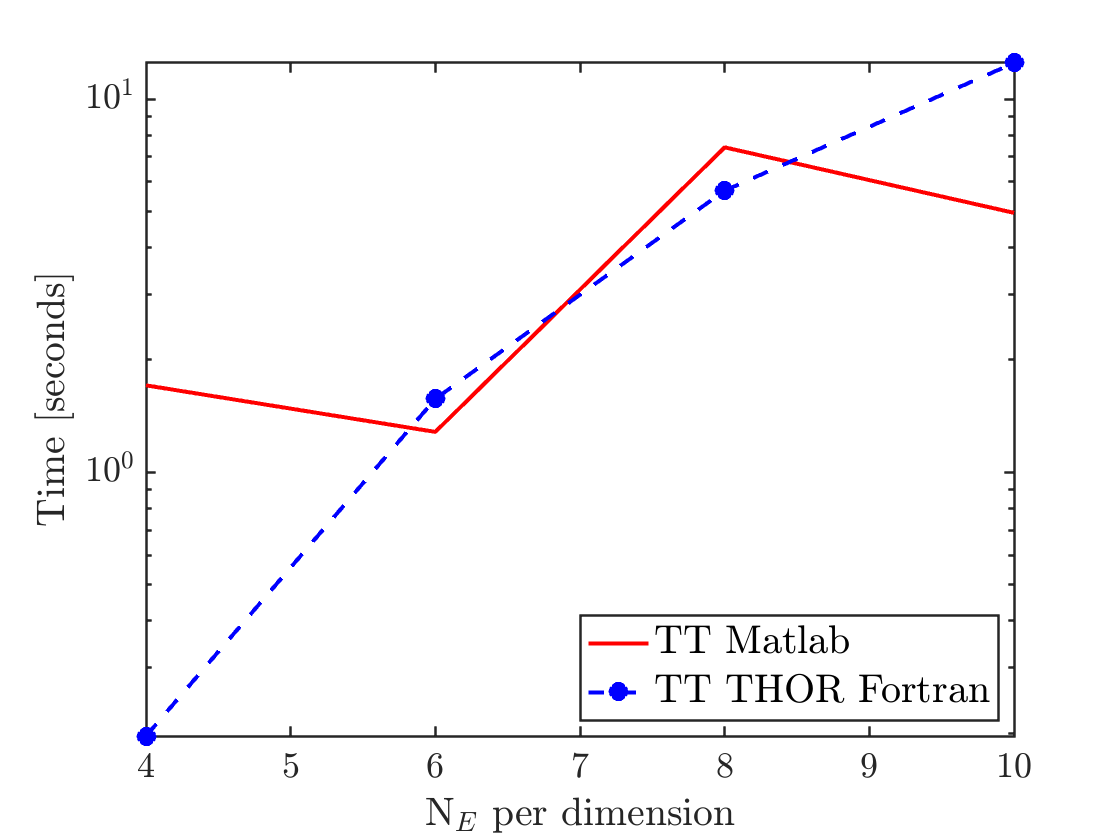

In [6]:
plot(Ns, tttime, '-', ...
    'DisplayName','TT Matlab', ...
    'Color','red', ...
    'LineWidth',2);

hold on;

plot(Ns, fortran_time, '--o', ...
    'DisplayName','TT THOR Fortran', ...
    'Color','blue', ...
    'LineWidth',2, ...   % thicker line
    'MarkerSize',8, ...  % bigger markers
    'MarkerFaceColor','blue'); % filled markers

legend('Location', 'southeast','FontSize',20,'Interpreter','latex');

xlabel(sprintf('N$_E$ per dimension'), 'Interpreter','latex', 'FontSize',20);

ylabel(sprintf('Time [seconds]'), 'Interpreter','latex', 'FontSize',20);

set(gca, 'YScale','log', ...
    'FontSize',18, ...
    'LineWidth',1.2, ...
    'TickLabelInterpreter','latex');

axis tight;

exportgraphics(gca, 'figures/Time_comparison.pdf', 'ContentType','vector', 'BackgroundColor','none');

clf;